In [84]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import linalg

In [108]:
def get_ss_tt(n):
    s = np.linspace(0, 2 * np.pi, n)
    t = np.linspace(0, np.pi, n)
    ss = []
    for v in s: ss.append(v)

    ss = [ss] * n
    tt = []
    for v in t: tt.append([v] * n)

    return ss, tt

In [124]:
def sphere(n, sh):
    x = lambda s, t : np.cos(s) * np.sin(t)
    y = lambda s, t : np.sin(s) * np.sin(t)
    z = lambda s, t : np.cos(t)
    s = np.linspace(0, 2 * np.pi, n)
    t = np.linspace(0, np.pi, n)
    ss = []
    for i in s:
        ss.append(i)
    ss = [ss] * n
    tt = []
    for i in t:
        tt.append([i]*n)

    xx = x(ss,tt).flatten()
    yy = y(ss,tt).flatten()
    zz = z(ss,tt).flatten()

    if sh:
        fig = plt.figure()
        ax = plt.axes(projection="3d")
        ax.plot3D(xx, yy, zz)
        plt.show()
    return xx, yy, zz


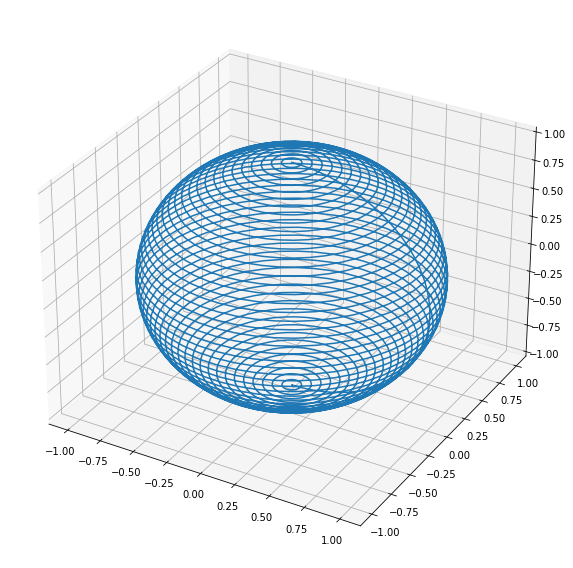

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.18459456e-16, 1.21459247e-16, 1.22464680e-16]),
 array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.10637274e-17, -1.56604357e-17, -2.99951957e-32]),
 array([ 1.,  1.,  1., ..., -1., -1., -1.]))

In [125]:
sphere(50, True)

In [126]:
def transform(n, A):
    x, y, z = sphere(n, False)
    row = [x, y, z]

    R = A @ row
    return R[0], R[1], R[2]

In [131]:
A1 = np.random.rand(3, 3)
A2 = np.random.rand(3, 3)
A3 = np.random.rand(3, 3)

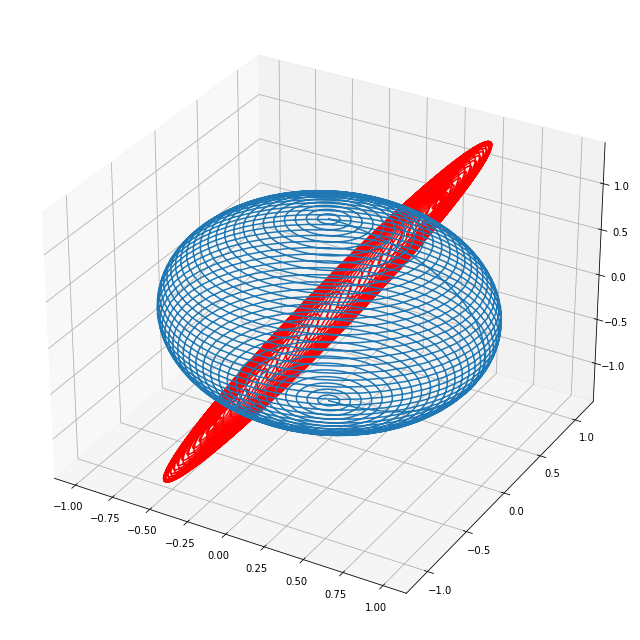

In [140]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection="3d")
s1, s2, s3 = sphere(50, False)
a,b,c = transform(50, A1)
ax.plot3D(a, b, c, c='r')
ax.plot3D(s1, s2, s3)
plt.show()

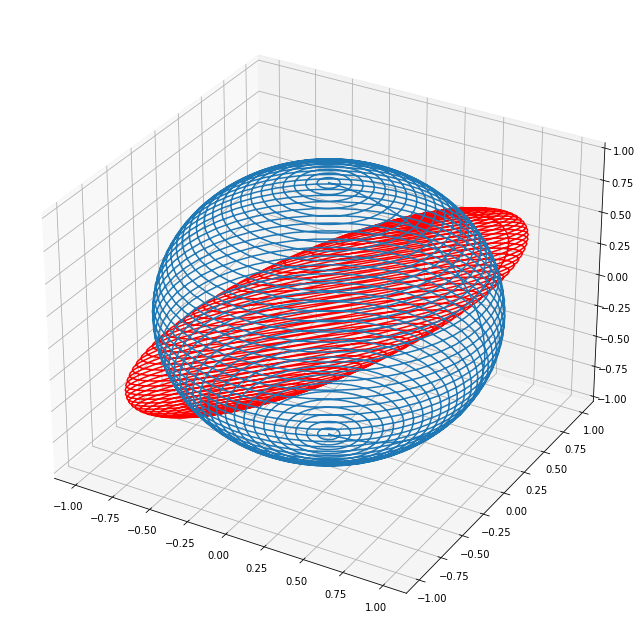

In [138]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection="3d")
s1, s2, s3 = sphere(50, False)
a,b,c = transform(50, A2)
ax.plot3D(a, b, c, c='r')
ax.plot3D(s1, s2, s3)
plt.show()

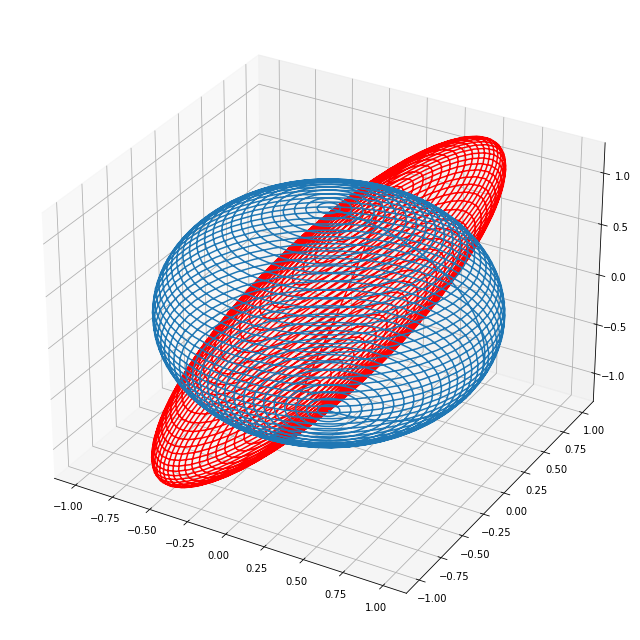

In [147]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection="3d")
s1, s2, s3 = sphere(50, False)
a,b,c = transform(50, A3)
ax.plot3D(a, b, c, c='r')
ax.plot3D(s1, s2, s3)
plt.show()

In [148]:
u1, s1, vh1 = np.linalg.svd(A3)

In [149]:
def svd_trans(u, s, p):
    start_x, start_y, start_z = (0, 0, 0)
    vector = u @ (np.diag(s))
    end_x = vector[0]
    end_y = vector[1]
    end_z = vector[2]

    fig = plt.figure(figsize=(12,9))
    ax = fig.gca(projection='3d')
    ax.plot3D(p[0], p[1], p[2])
    ax.quiver(start_x, start_y, start_y, end_x, end_y, end_z, color='black')
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_16656\1930032934.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


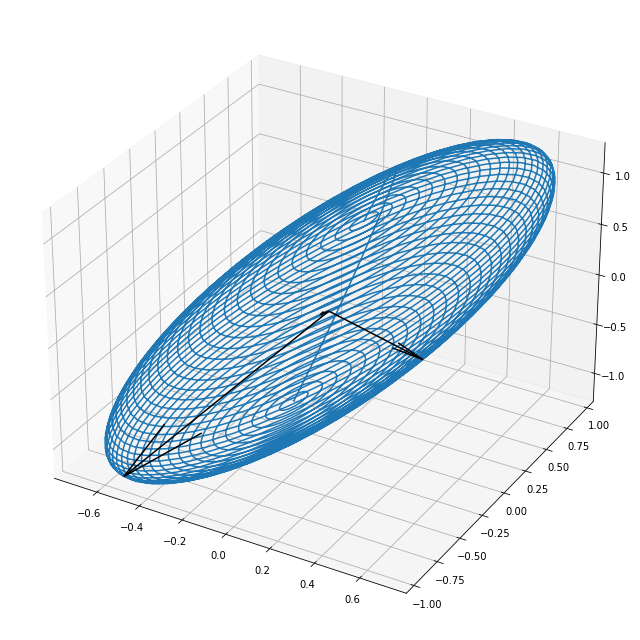

In [150]:
svd_trans(u1, s1, (a,b,c))

In [ ]:
im = Image.open("lena_gray (1).gif")
im = im.convert('L')
array = np.asarray(im)
print(array.shape)

In [47]:
u, s, v = linalg.svd(array)

In [49]:
rank = 5
ur = u[:, :rank]
sr = np.matrix(linalg.diagsvd(s[:rank], rank, rank))
vr = v[:rank, :]
b = np.asarray(ur * sr * vr)
img2 = Image.fromarray(b)
img2.show()
img2.save("image10.gif")